In [ ]:
#attempting to run a multilinear model

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
X_train = pd.read_csv("../Caroline/X_train42.csv")
y_train = pd.read_csv("../Caroline/y_train42.csv")
X_test = pd.read_csv("../Caroline/X_test42.csv")
y_test = pd.read_csv("../Caroline/y_test42.csv")

In [5]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

In [6]:
ols.fit(X_train, y_train)

LinearRegression()

In [7]:
ols.score(X_train, y_train)

0.9371207742775771

In [8]:
ols.score(X_test, y_test)

0.9182864163090958

In [9]:
y_train

,SalePrice
0,118500
1,157000
2,254900
3,84500
4,174500
...,...
2041,165000
2042,76000
2043,114500
2044,163000


In [10]:
print(len(pd.DataFrame(ols.coef_).transpose()))
len(X_train.columns.tolist())

230


230

In [11]:
colnames = X_train.columns
result = pd.DataFrame(ols.coef_)
result.columns = colnames.tolist()
#result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
GrLivArea,36.246478
LotFrontage,5.954778
LotArea,0.655625
OverallQual,7130.373381
OverallCond,6141.413684
...,...
SaleCondition__Abnorml,-2812.608045
SaleCondition__AdjLand,-2692.953293
SaleCondition__Alloca,9878.390215
SaleCondition__Family,-6906.870939


In [12]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
print(ans.summary())

#Royce says use Lasso to see which coefficients go down to 0 instead of selecting by p value

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     123.0
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        23:12:21   Log-Likelihood:                -23043.
No. Observations:                2046   AIC:                         4.653e+04
Df Residuals:                    1824   BIC:                         4.778e+04
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -8.71

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Lasso

In [13]:
#helpful website
# https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#first need to scale! I don't think joaquin's model scaled

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = X_train.columns)


In [15]:
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_validate, train_test_split

#not sure how to do this

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# lasso_alphas = np.linspace(0, 0.2, 21)
# lasso = Lasso()
# grid = dict()
# grid['alpha'] = lasso_alphas
# gscv = GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# results = gscv.fit(X_train_scaled, y_train)
# print('MAE: %.5f' % results.best_score_)
# print('Config: %s' % results.best_params_)

In [16]:
#could use geopy on the combo csvs and map like the highest sale prices or something


In [17]:
ridge = Ridge()
lasso = Lasso()

In [27]:
#Looking at lecture code
ridge.set_params(max_iter = 10000, normalize=True)
lasso.set_params(max_iter = 10000, normalize=True)
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

# alphas = np.linspace(0.01, 10, 100)
#copied joaquin's alphas
alphas = np.linspace(.1, 10.1,20)


for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, y_train)
            lasso.fit(X_train, y_train)
            ridge_scores_train.append(ridge.score(X_train, y_train))
            ridge_scores_test.append(ridge.score(X_test, y_test))
            lasso_scores_train.append(lasso.score(X_train, y_train))
            lasso_scores_test.append(lasso.score(X_test, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

In [28]:
max_index = list(lasso_scores_test).index(max(lasso_scores_test))
alphas[max_index]

3.2578947368421054

Text(0, 0.5, '$R^2$')

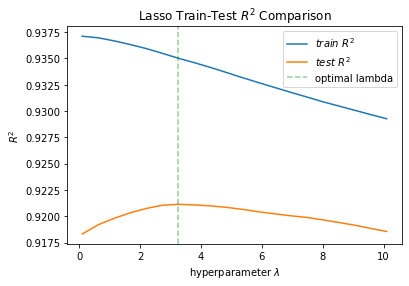

In [29]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(alphas[max_index], linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [30]:
lasso.set_params(alpha=alphas[max_index], normalize = True)
lasso.fit(X_train, y_train)
print(lasso.score(X_train, y_train))
lasso.score(X_test, y_test)

#So this model is slightly better than MLR

0.9350237740684186


0.9211416762020457

In [22]:
optimal_coefs = lasso.coef_.reshape(1,230)

In [23]:
coefs_lasso = pd.DataFrame(optimal_coefs, columns = X_train.columns)  
coefs_lasso.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0,58.048792,10.006304,0.60603,7565.485753,5857.384372,399.728637,28.079895,11.257763,-293.514236,2.051376,...,0.0,-4736.277601,0.0,-9429.775877,-0.0,-1501.672079,-2847.173734,5815.423671,-8215.797337,7028.687523


In [24]:
coefs_lasso == 0

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False


In [177]:
to_drop = coefs_lasso.columns[(coefs_lasso == 0).all()]

In [178]:
to_drop


Index(['FullBath', 'TotRmsAbvGrd', 'Fence', 'MSSubClass__40', 'MSSubClass__45',
       'MSSubClass__50', 'MSSubClass__70', 'MSSubClass__85', 'MSSubClass__180',
       'MSZoning__A (agr)', 'MSZoning__I (all)', 'MSZoning__RH',
       'LotConfig__Corner', 'Neighborhood__Mitchel', 'Neighborhood__OldTown',
       'Neighborhood__SawyerW', 'Neighborhood__Timber', 'Condition1__PosN',
       'Condition2__Artery', 'Condition2__RRAn', 'BldgType__2fmCon',
       'BldgType__Duplex', 'HouseStyle__2Story', 'HouseStyle__SLvl',
       'RoofStyle__Hip', 'Exterior1st__AsbShng', 'Exterior1st__AsphShn',
       'Exterior1st__BrkComm', 'Exterior1st__MetalSd', 'Exterior1st__Plywood',
       'Exterior1st__Stucco', 'Exterior2nd__Brk Cmn', 'Exterior2nd__CBlock',
       'Exterior2nd__PreCast', 'Exterior2nd__Stone', 'Exterior2nd__Wd Sdng',
       'Foundation__BrkTil', 'Foundation__Slab', 'BsmtCond__Gd',
       'BsmtCond__NA', 'BsmtCond__Po', 'BsmtExposure__NA', 'HeatingQC__Po',
       'Electrical__FuseA', 'Electri

In [179]:
#Now should go through these items and see what the deal is. Are they just items that had very few houses matching?
#cant just drop cols ?

Ridge

Text(0, 0.5, '$R^2$')

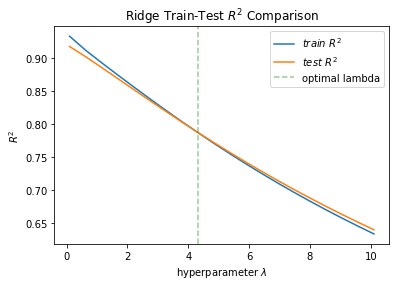

In [31]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.title(r'Ridge Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
last_underfit  = np.min(alphas[ridge_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [38]:
#Pretty bad r2 not even gonna look at what it is at the intersection

max(ridge_scores_test)




array([ 0.1       ,  0.62631579,  1.15263158,  1.67894737,  2.20526316,
        2.73157895,  3.25789474,  3.78421053,  4.31052632,  4.83684211,
        5.36315789,  5.88947368,  6.41578947,  6.94210526,  7.46842105,
        7.99473684,  8.52105263,  9.04736842,  9.57368421, 10.1       ])

In [318]:
list(ridge_scores_test).index(max(ridge_scores_test))

#this might not have been the right range of alphas to run for ridge. let me try a quick grid search.

0

In [34]:
ridge = Ridge()

In [35]:
#tried cv but couldn't get anything better really
# ridge = Ridge()
# params = {
#     "alpha": np.linspace(0,10,100)
# }

params = {
    "alpha": np.linspace(0.1,10.1,20), 'normalize' : [True] }

gs = GridSearchCV(ridge, params)
gs.fit(X_train, y_train)

print(gs)
# summarize the results of the grid search
print(gs.best_score_)
print(gs.best_estimator_.alpha)

#oh cuz in reality the best r2 is when lambda is closest to 0

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([ 0.1       ,  0.62631579,  1.15263158,  1.67894737,  2.20526316,
        2.73157895,  3.25789474,  3.78421053,  4.31052632,  4.83684211,
        5.36315789,  5.88947368,  6.41578947,  6.94210526,  7.46842105,
        7.99473684,  8.52105263,  9.04736842,  9.57368421, 10.1       ]),
                         'normalize': [True]})
0.8999959082191087
0.1


In [41]:
gs.score(X_test, y_test)

0.9172225039106934

In [392]:
ridge.set_params(alpha = .0000001, normalize = True)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.9182864176271329

In [395]:
ridge.score(X_train, y_train)

0.937120774277546

Elastic Net

In [42]:
elasticnet = ElasticNet()

In [ ]:
#Doesn't converge idk

# N_alpha = 100
# N_rho   = 10
# alphaRange = np.logspace(-10, 2, N_alpha)
# rhoRange   = np.linspace(0.1,1, N_rho) # we avoid very small rho by starting at 0.1
# train_scores     = np.zeros((N_rho, N_alpha))
# test_scores     = np.zeros((N_rho, N_alpha))
# for alphaIdx, alpha in enumerate(alphaRange):
#     for rhoIdx, rho in enumerate(rhoRange):
#             elasticnet.set_params(max_iter = 30000, alpha=alpha, l1_ratio=rho)
#             elasticnet.fit(X_train, y_train)
#             train_scores[rhoIdx, alphaIdx] = elasticnet.score(X_train, y_train)   
#             elasticnet.fit(X_test, y_test)
#             test_scores[rhoIdx, alphaIdx] = elasticnet.score(X_test, y_test)   

In [48]:
params = {
    "alpha": np.linspace(0.1,10.1,20), 'l1_ratio': np.linspace(0.1, 1, 10), 'normalize' : [True], 'max_iter' : [10000] }

gs_elas = GridSearchCV(elasticnet, params)
gs_elas.fit(X_train, y_train)

print(gs_elas)
# summarize the results of the grid search
print(gs_elas.best_score_)
print(gs_elas.best_estimator_.alpha)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([ 0.1       ,  0.62631579,  1.15263158,  1.67894737,  2.20526316,
        2.73157895,  3.25789474,  3.78421053,  4.31052632,  4.83684211,
        5.36315789,  5.88947368,  6.41578947,  6.94210526,  7.46842105,
        7.99473684,  8.52105263,  9.04736842,  9.57368421, 10.1       ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'max_iter': [10000], 'normalize': [True]})
0.9015869803848406
10.1


In [50]:
print(gs_elas.score(X_train, y_train))
gs_elas.score(X_test, y_test)

0.9292717099998591


0.9185595595145662

In [ ]:
#joaquin's lasso didn't normalize and had a better R2
#try that too
#try log transform



Lasso and Ridge, not normalized

In [ ]:
#Looking at lecture code
ridge.set_params(max_iter = 100000, normalize=False)
lasso.set_params(max_iter = 100000, normalize=False)
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0.01, 20, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, y_train)
            lasso.fit(X_train, y_train)
            ridge_scores_train.append(ridge.score(X_train, y_train))
            ridge_scores_test.append(ridge.score(X_test, y_test))
            lasso_scores_train.append(lasso.score(X_train, y_train))
            lasso_scores_test.append(lasso.score(X_test, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

In [140]:
max_index = list(lasso_scores_test).index(max(lasso_scores_test))
print(max(lasso_scores_test))
alphas[max_index]

0.9224049704264469


18.182727272727274

In [ ]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(alphas[max_index], linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [129]:
#So actually not normalizing gives a slightly better R2
best_r2 = max(lasso_scores_test)
best_r2

18.182727272727274

In [131]:
best_lasso = Lasso()
best_lasso.set_params(alpha = alphas[max_index], normalize = False, max_iter = 100000)
best_lasso.fit(X_train, y_train)
best_lasso.score(X_test, y_test)
best_lasso.coef_

array([ 3.67994545e+01,  1.67033199e+01,  6.21150250e-01,  7.62228804e+03,
        6.28027394e+03,  4.43204046e+02,  2.93416874e+01,  1.44548095e+01,
       -1.10484145e+03,  2.24683336e+01,  2.77166738e+01,  1.93727466e+03,
       -4.16597731e+02,  7.65741931e+01,  9.29316156e+02, -4.90575824e+03,
       -1.05048637e+04,  4.94582361e+01,  2.53668604e+03,  7.78328314e+03,
        8.65385298e+00, -1.01384823e+01,  1.25398449e+01, -7.19115395e+00,
        2.45117418e+01,  0.00000000e+00, -3.53213417e+02,  5.48758579e+02,
        3.07313331e+01,  2.39015400e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.38189059e+03,  6.87953637e+02,  6.76234586e+03,
       -3.57727902e+03, -0.00000000e+00, -1.41657545e+04, -2.59242238e+03,
       -1.33873807e+04, -0.00000000e+00, -3.20467705e+03,  0.00000000e+00,
       -1.24960422e+04, -7.40486924e+03,  0.00000000e+00, -0.00000000e+00,
       -7.10367478e+03, -1.57685029e+03,  3.40398394e+03, -4.94351193e+03,
       -8.44978623e+03,  

In [139]:
#lets see what variables remain

best_coefs_lasso = pd.DataFrame(best_lasso.coef_.reshape(1,230), columns = X_train.columns)  
best_coefs_lasso
len(best_coefs_lasso.columns[(best_coefs_lasso != 0).all()])
#brings us down to 171 columns lol. Probably EDA should focus on info in those?

171

Lasso not normalized, log transform. Ok so I don't think that's how you're supposed to do it. Probs need to transform the data before finding alpha.

In [143]:
# log y lasso model
log_lasso = Lasso()
log_lasso.set_params(alpha = alphas[max_index])
log_lasso.fit(X_train, np.log(y_train))
print('Train R2: ', log_lasso.score(X_train, np.log(y_train)))
print('Test R2: ', log_lasso.score(X_test, np.log(y_test)))

Train R2:  0.6203498438765596
Test R2:  0.6169216092892774


Ridge not normalized

In [ ]:
max_index = list(ridge_scores_test).index(max(ridge_scores_test))
alphas[max_index]

In [ ]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.title(r'Ridge Train-Test $R^2$ Comparison')
# ridge_underfit = ridge_scores_train < ridge_scores_test
# last_underfit  = np.min(alphas[ridge_underfit])
plt.axvline(alphas[max_index], linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [ ]:
max(ridge_scores_test)

Log MLR

In [147]:
log_ols = linear_model.LinearRegression()
log_ols.fit(X_train, np.log(y_train))
print('Train R2: ', log_ols.score(X_train, np.log(y_train)))
print('Test R2: ', log_ols.score(X_test, np.log(y_test)))

#ok now this beats our lasso model!!

Train R2:  0.9418013723456785
Test R2:  0.9231511364639096


Lasso/Ridge Log transform... I guess normalized?

In [76]:
#Looking at lecture code
#SOS. I am def doing something wrong here, cuz train r2 are basically all 0

#don't use this one, see further below
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

log_ridge = Ridge()
log_lasso = Lasso()
log_ridge.set_params(max_iter = 100000, normalize=True)
log_lasso.set_params(max_iter = 100000, normalize=True)
log_ridge_scores_train = []
log_lasso_scores_train = []
log_ridge_scores_test  = []
log_lasso_scores_test  = []

alphas = np.linspace(0.1, .12, 1000)

for alpha in alphas:
            log_ridge.set_params(alpha=alpha)
            log_lasso.set_params(alpha=alpha)
            log_ridge.fit(X_train, log_y_train)
            log_lasso.fit(X_train, log_y_train)
            log_ridge_scores_train.append(log_ridge.score(X_train, log_y_train))
            log_ridge_scores_test.append(log_ridge.score(X_test, log_y_test))
            log_lasso_scores_train.append(log_lasso.score(X_train, log_y_train))
            log_lasso_scores_test.append(log_lasso.score(X_test, log_y_test))
log_ridge_scores_train = np.array(log_ridge_scores_train) 
log_ridge_scores_test  = np.array(log_ridge_scores_test)
log_lasso_scores_train = np.array(log_lasso_scores_train) 
log_lasso_scores_test  = np.array(log_lasso_scores_test)

/var/folders/8p/6k3vrp795231q_pwy6nvxz5w0000gn/T/ipykernel_64554/2156011267.py:21: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  log_lasso.fit(X_train, log_y_train)
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.873113325193717, tolerance: 0.03049251737651772
  model = cd_fast.enet_coordinate_descent(


In [77]:
log_max_index = list(log_lasso_scores_test).index(max(log_lasso_scores_test))
print(max(log_lasso_scores_test))
alphas[log_max_index]


0.9236809449636861


0.00012012012012012012

In [250]:
log_lasso_scores_test

NameError: name 'log_lasso_scores' is not defined

ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

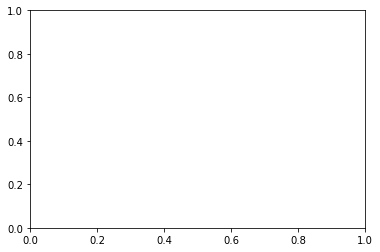

In [396]:
#Lol sos
plt.plot(alphas, log_lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, log_lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Logy Lasso Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(alphas[log_max_index], linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [397]:
log_max_index = list(log_ridge_scores_test).index(max(log_ridge_scores_test))
print(max(log_ridge_scores_test))
alphas[log_max_index]

0.927069685894114


0.11183183183183183

Text(0, 0.5, '$R^2$')

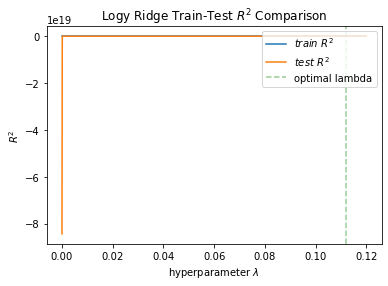

In [398]:
#Lol sos
plt.plot(alphas, log_ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, log_ridge_scores_test, label=r'$test\ R^2$')
plt.title(r'Logy Ridge Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(alphas[log_max_index], linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')


In [407]:
log_ridge.set_params(alpha = alphas[log_max_index])
log_ridge.score(X_train, np.log(y_train))
#try alpha = 1b


0.9270634012613549

In [299]:
alphas = np.logspace(-10, .5, 100)
alphas

array([1.00000000e-10, 1.27661695e-10, 1.62975083e-10, 2.08056754e-10,
       2.65608778e-10, 3.39080668e-10, 4.32876128e-10, 5.52617002e-10,
       7.05480231e-10, 9.00628020e-10, 1.14975700e-09, 1.46779927e-09,
       1.87381742e-09, 2.39214708e-09, 3.05385551e-09, 3.89860370e-09,
       4.97702356e-09, 6.35375264e-09, 8.11130831e-09, 1.03550337e-08,
       1.32194115e-08, 1.68761248e-08, 2.15443469e-08, 2.75038784e-08,
       3.51119173e-08, 4.48244688e-08, 5.72236766e-08, 7.30527154e-08,
       9.32603347e-08, 1.19057724e-07, 1.51991108e-07, 1.94034425e-07,
       2.47707636e-07, 3.16227766e-07, 4.03701726e-07, 5.15372466e-07,
       6.57933225e-07, 8.39928706e-07, 1.07226722e-06, 1.36887451e-06,
       1.74752840e-06, 2.23092437e-06, 2.84803587e-06, 3.63585086e-06,
       4.64158883e-06, 5.92553098e-06, 7.56463328e-06, 9.65713905e-06,
       1.23284674e-05, 1.57387304e-05, 2.00923300e-05, 2.56502091e-05,
       3.27454916e-05, 4.18034496e-05, 5.33669923e-05, 6.81292069e-05,
      

In [78]:
#tam code plus my update
model_lasso = Lasso()


log_lasso_scores_train = []

log_lasso_scores_test  = []

alphas = np.logspace(-10, 0.5, 100)
model_lasso.set_params(max_iter = 1000000, normalize = True)
for alpha in alphas:
            model_lasso.set_params(alpha=alpha)
            model_lasso.fit(X_train, log_y_train)
            log_lasso_scores_train.append(model_lasso.score(X_train, log_y_train))
            log_lasso_scores_test.append(model_lasso.score(X_test, log_y_test))
log_lasso_scores_train = np.array(log_lasso_scores_train) 
log_lasso_scores_test  = np.array(log_lasso_scores_test)

In [79]:
log_max_index = list(log_lasso_scores_test).index(max(log_lasso_scores_test))
print(max(log_lasso_scores_test))
alphas[log_max_index]

0.930691419798424


3.274549162877732e-05

In [92]:
logy_lasso_bestalpha = 3.274549162877732e-05

In [93]:
#just confirming
best_logy_lasso = Lasso()
best_logy_lasso.set_params(normalize = True, max_iter = 10000, alpha = logy_lasso_bestalpha)
best_logy_lasso.fit(X_train, log_y_train)
best_logy_lasso.score(X_train, log_y_train)
best_logy_lasso.score(X_test, log_y_test)

0.930691419798424

In [99]:
#Tam/Royce say this is how to calculate R2 for Log ones
y_testpred = best_logy_lasso.predict(X_test)
y_trainpred = best_logy_lasso.predict(X_train)
print_score(y_train, np.exp(y_trainpred), "Logy Lasso Train")
print_score(y_test, np.exp(y_testpred), "Logy Lasso Test")

- Regressor: Logy Lasso Train
R²: 0.9411394046053754
RMSE: 18223.507042305842

- Regressor: Logy Lasso Test
R²: 0.9349758691098019
RMSE: 19175.67477209986



In [87]:
#tam model
alpha = .00008

tam = Lasso()
tam.set_params(normalize = True, max_iter = 1000000, alpha = alpha)
tam.fit(X_train, np.log(y_train))
# tam.score(X_train, y_train)
tam.score(X_test, y_test)



0.9183092180387704

In [85]:
tam.score(X_test, y_test)
tam.predict

NameError: name 'tam' is not defined

In [96]:
#tams function
from sklearn.metrics import mean_squared_error, r2_score
def print_score(test, pred, model): 
    """
    Create func to print R^2 and RMSE
    """
    r2_ = r2_score(test, pred)
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    
    print(f"- Regressor: {model}")
    print(f"R²: {r2_}")
    print(f"RMSE: {rmse_}\n")

In [312]:
#weird I am getting the same r 2.
y_pred_lasso = tam.predict(X_test)
print_score(y_test, y_pred_lasso, "Lasso")

- Regressor: Lasso
R²: 0.9183092042721847
RMSE: 21493.143604698562



Text(0, 0.5, '$R^2$')

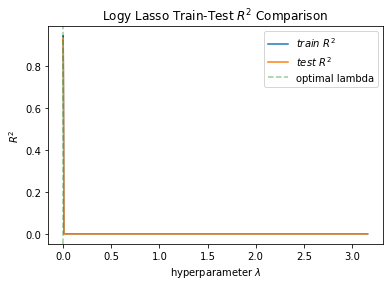

In [304]:
plt.plot(alphas, log_lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, log_lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Logy Lasso Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(alphas[log_max_index], linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [302]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# scaler.transform(X_train)
# #is this right? Do i have to transform y as well?

#royce says normalize is enough

In [52]:
log_lasso = Lasso()

In [161]:
# I should do gridsearchCV instead of a forloop

grid_para_log_lasso = {'alpha': np.logspace(-10,.1,20), 'max_iter' : [1000000], 'normalize': [True]}

log_lasso_gs = GridSearchCV(log_lasso, grid_para_log_lasso)#, cv = 3)
log_lasso_gs.fit(X_train, np.log(y_train))
log_lasso_gs.cv_results_

KeyboardInterrupt: 

In [ ]:
log_lasso_gs.best_score_

In [67]:
np.logspace(-10,.1,20)

array([1.00000000e-10, 3.40078321e-10, 1.15653264e-09, 3.93311679e-09,
       1.33756775e-08, 4.54877795e-08, 1.54694077e-07, 5.26081018e-07,
       1.78908749e-06, 6.08429869e-06, 2.06913808e-05, 7.03669004e-05,
       2.39302573e-04, 8.13816172e-04, 2.76761237e-03, 9.41204967e-03,
       3.20083405e-02, 1.08853427e-01, 3.70186906e-01, 1.25892541e+00])

In [58]:
log_lasso.set_params(alpha = .00008, max_iter = 10000, normalize = True)
log_lasso.fit(X_train, np.log(y_train))
log_lasso.score(X_train, np.log(y_train))
log_lasso.score(X_test, np.log(y_test))

0.9278297814796514

Elastic Net Log

In [100]:
elasticnet = ElasticNet()

In [101]:
.00007

7e-05

In [103]:
np.linspace(.00001,.00012, 10)

array([1.00000000e-05, 2.22222222e-05, 3.44444444e-05, 4.66666667e-05,
       5.88888889e-05, 7.11111111e-05, 8.33333333e-05, 9.55555556e-05,
       1.07777778e-04, 1.20000000e-04])

In [153]:
#did not converge. need to try different params

# Tam's params: ElasticNet(alpha = .00007)
#'l1_ratio': np.linspace(0.1, 1, 10), took this out of params
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3, shuffle=True, random_state=1)


params = {
    "alpha": np.linspace(.00001,.0002, 10), 'normalize' : [True], 'max_iter' : [100000] }

gs_elas = GridSearchCV(elasticnet, params, cv = kfold)
gs_elas.fit(X_train, np.log(y_train))

print(gs_elas)
# summarize the results of the grid search
print(gs_elas.best_score_)
print(gs_elas.best_estimator_.alpha)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-05, 3.11111111e-05, 5.22222222e-05, 7.33333333e-05,
       9.44444444e-05, 1.15555556e-04, 1.36666667e-04, 1.57777778e-04,
       1.78888889e-04, 2.00000000e-04]),
                         'max_iter': [100000], 'normalize': [True]})
0.9133656199373049
9.444444444444444e-05


In [ ]:
gs_elas.best_estimator_.score(X_test, np.log(y_test))

In [160]:
#Isn't the best estimator picking the one with the best train r2??? Not test??
y_testpred = gs_elas.best_estimator_.predict(X_test)
y_trainpred = gs_elas.best_estimator_.predict(X_train)
print_score(y_train, np.exp(y_trainpred), 'Elastic Net Logy Train')
print_score(y_test, np.exp(y_testpred), 'Elastic Net Logy Test')

- Regressor: Elastic Net Logy Train
R²: 0.9367280583000426
RMSE: 18894.056717563177

- Regressor: Elastic Net Logy Test
R²: 0.9328546611763506
RMSE: 19485.93780435858



In [133]:
#Ok I can't get this with gridsearch apparently but tams alpha does seem to be the best one lol
elasticnettest = ElasticNet()
elasticnettest.set_params(alpha = .000007, normalize = True, max_iter = 10000)
elasticnettest.fit(X_train, np.log(y_train))

ElasticNet(alpha=7e-06, max_iter=10000, normalize=True)

In [134]:
elasticnettest.predict(X_test)
print_score(y_test, np.exp(elasticnettest.predict(X_test)), 'Elastic Net Logy Test')

- Regressor: Elastic Net Logy Test
R²: 0.9353052437903866
RMSE: 19127.046668449537

